In [1]:
import MLP
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Get data, 数据增强，在5-1中筛选了数据进行补充，其余作为测试数据

In [2]:
data = np.load('./databygroup.npy',allow_pickle=True).tolist()
#聚类筛选的数据，从step5-1中直接复制
#selected_dataid = ['historydata', 'sub2', 'sub3', 'sub4', 'sub5', 'sub6', 'sub7', 'sub8', 'sub9', 
#                   'sub10', 'sub11', 'sub12', 'sub13', 'sub14', 'sub17', 'sub18', 'sub19', 'sub21', 
#                   'sub22', 'sub23', 'sub24', 'sub25', 'sub26', 'sub27', 'sub28', 'sub30', 'sub31', 
#                   'sub32', 'sub33', 'sub35', 'sub36', 'sub37', 'sub39', 'sub41', 'sub42', 'sub44', 
#                   'sub45', 'sub46', 'sub47', 'sub48', 'sub49', 'sub50', 'sub51', 'sub52', 'sub53', 
#                   'sub54', 'sub56', 'sub58', 'sub59', 'sub61', 'sub62', 'sub63', 'sub65', 'sub66', 
#                   'sub67', 'sub68', 'sub69', 'sub70', 'sub71', 'sub73', 'sub74']
selected_dataid = ['historydata', 'sub3', 'sub4', 'sub5', 'sub8', 'sub9', 'sub11', 'sub12', 'sub14', 
                   'sub19', 'sub21', 'sub24', 'sub25', 'sub26', 'sub31', 'sub35', 'sub37', 'sub39', 
                   'sub41', 'sub42', 'sub44', 'sub46', 'sub47', 'sub49', 'sub51', 'sub52', 'sub53', 
                   'sub56', 'sub58', 'sub59', 'sub61', 'sub63', 'sub68', 'sub70', 'sub73', 'sub74']

TrainData,TestData={},{}
for k in data.keys():
    TestData[k]=data[k]

for k in data.keys():
    if k in selected_dataid:
        TrainData[k]=data[k]
        
#Tdata=TrainData[TrainData.keys()]
step=20
xtrain,ytrain=[],[]
for k in TrainData.keys():
    for i in range(TrainData[k].shape[0]-step-1):
        xtrain.append(TrainData[k][i:i+step,:TrainData[k].shape[1]-5].reshape((1,-1)).tolist()[0])
        ytrain.append(TrainData[k][i+1+step,[-5,-4,-3,-2,-1]].tolist())
    #xtrain.append(xtem)
    #ytrain.append(ytem)
xtrain = Variable(torch.FloatTensor(xtrain))
ytrain = Variable(torch.FloatTensor(ytrain))

print(TrainData.keys())
print(xtrain.shape,ytrain.shape)

dict_keys(['historydata', 'sub3', 'sub4', 'sub5', 'sub8', 'sub9', 'sub11', 'sub12', 'sub14', 'sub19', 'sub21', 'sub24', 'sub25', 'sub26', 'sub31', 'sub35', 'sub37', 'sub39', 'sub41', 'sub42', 'sub44', 'sub46', 'sub47', 'sub49', 'sub51', 'sub52', 'sub53', 'sub56', 'sub58', 'sub59', 'sub61', 'sub63', 'sub68', 'sub70', 'sub73', 'sub74'])
torch.Size([23032, 300]) torch.Size([23032, 5])


In [5]:
ind = np.random.randint(0,xtrain.shape[0],int(xtrain.shape[0]*0.7))
print(ind.shape)
np.save('./0.7alldata.npy',ind)

(16122,)


# MLP

## 训练

In [3]:
param={
    'inputsize':xtrain.shape[1],
    'outputsize':ytrain.shape[1],
    'layers':[20 for _ in range(40)],
    'act':['tanh' for _ in range(40)]+['tanh'],
    'learning_rate':0.001,
    'opt':'Adam',
}

In [4]:
train=False
initial_train=True
net = MLP.MLP(param)
print(net)
if train:
    if not initial_train:
        net=torch.load('./model/MLP.pth')
    optimizer = torch.optim.Adam(net.parameters(),lr = param['learning_rate'])
    loss_func = torch.nn.MSELoss()
    mse,vmse=[],[]
    xt, yt = xtrain[ind], ytrain[ind]
    xv, yv = xtrain, ytrain
    for t in range(100):
        prediction = net(xt)
        loss = loss_func(prediction,yt)
                
        vp = net(xv)
        lossv = loss_func(vp,yv)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        mse.append(loss.detach().numpy())
        vmse.append(lossv.detach().numpy())
        if np.mod(t,10)==0:
            torch.save(net,'./model/MLP'+str(t)+'.pth')
            torch.save(net,'./model/MLP.pth')
            #np.save('./mse'+str(t)+'.npy',mse)

    plt.plot(mse)
    torch.save(net.model,'./model/MLP.pth')
else:
    net=torch.load('./model/MLP.pth')

MLP(
  (model): Sequential(
    (input): Linear(in_features=300, out_features=20, bias=True)
    (h1): Linear(in_features=20, out_features=20, bias=True)
    (h2): Linear(in_features=20, out_features=20, bias=True)
    (h3): Linear(in_features=20, out_features=20, bias=True)
    (h4): Linear(in_features=20, out_features=20, bias=True)
    (h5): Linear(in_features=20, out_features=20, bias=True)
    (h6): Linear(in_features=20, out_features=20, bias=True)
    (h7): Linear(in_features=20, out_features=20, bias=True)
    (h8): Linear(in_features=20, out_features=20, bias=True)
    (h9): Linear(in_features=20, out_features=20, bias=True)
    (h10): Linear(in_features=20, out_features=20, bias=True)
    (h11): Linear(in_features=20, out_features=20, bias=True)
    (h12): Linear(in_features=20, out_features=20, bias=True)
    (h13): Linear(in_features=20, out_features=20, bias=True)
    (h14): Linear(in_features=20, out_features=20, bias=True)
    (h15): Linear(in_features=20, out_features=2

## 测试

In [5]:
test_data = np.load('./databygroup.npy',allow_pickle=True).tolist()
#聚类筛选的数据，从step5-1中直接复制
TrainData,TestData={},{}
for k in data.keys():
    TrainData[k]=test_data[k]
    TestData[k]=test_data[k]
        
#Tdata=TrainData[TrainData.keys()]
step=20
test_xtrain,test_ytrain=[],[]
for k in TestData.keys():
    for i in range(TrainData[k].shape[0]-step-1):
        test_xtrain.append(TrainData[k][i:i+step,:TrainData[k].shape[1]-5].reshape((1,-1)).tolist()[0])
        test_ytrain.append(TrainData[k][i+1+step,[-5,-4,-3,-2,-1]].tolist())
    #xtrain.append(xtem)
    #ytrain.append(ytem)
test_xtrain = Variable(torch.FloatTensor(test_xtrain))
test_ytrain = Variable(torch.FloatTensor(test_ytrain))

print(test_xtrain.shape, test_ytrain.shape)

torch.Size([43784, 300]) torch.Size([43784, 5])


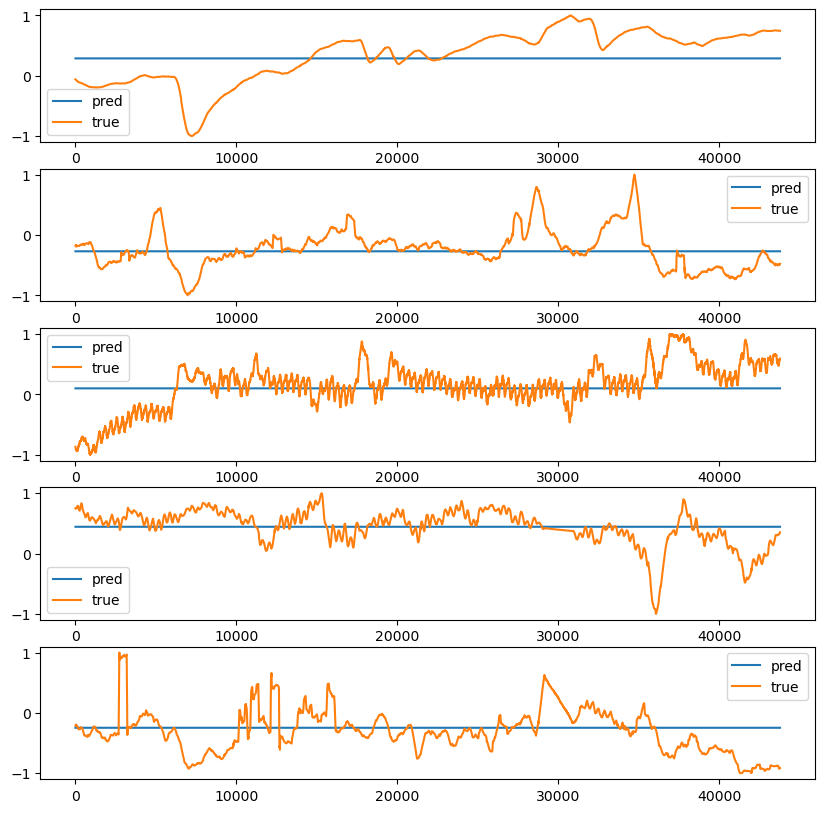

In [6]:
yp = net(test_xtrain)
fig,ax=plt.subplots(5,1,figsize=(10,10))
for i in range(5):
    ax[i].plot(yp.detach().numpy()[:,i],label='pred')
    ax[i].plot(test_ytrain.detach().numpy()[:,i],label='true')
    
    ax[i].legend()